# Import data and pre-processing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns

#import graphviz 

from treend import *
from reg_tree import *


ModuleNotFoundError: No module named 'treend'

In [ ]:
df = pd.read_csv('../datasets/Automobile_data.csv')

In [ ]:
sum=0
for col in df.columns:
    if('?' in df[col].values):
        sum = sum + len(df[df[col]=='?'])
        print(col , "  has " , str(len(df[df[col]=='?'])), "missing values")
print ("Total # of missing values",sum)

In [ ]:
df=df.replace('?',np.nan)

In [ ]:
df_check=df.drop(["normalized-losses"], axis=1)
df_check[df_check.isnull().T.any().T]

In [120]:
print(df)

     symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

In [121]:
# Create numerical values of ordinal features
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
df = df.replace(cleanup_nums)

In [90]:
print(df_imputed)

     symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

     num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0             2.0  convertible          rwd           front        88.6  ...   

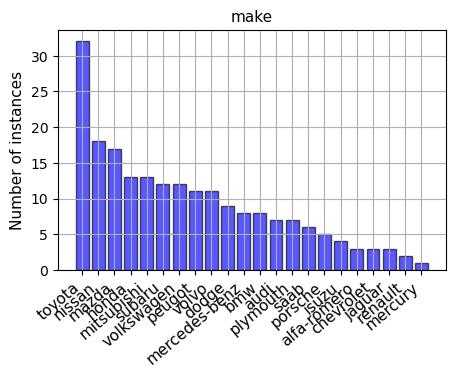

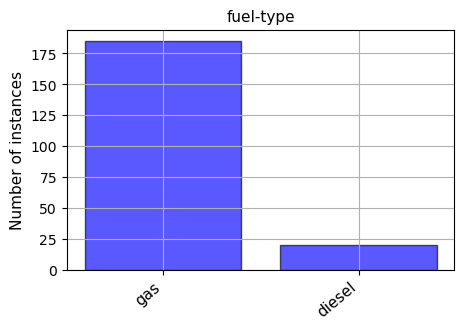

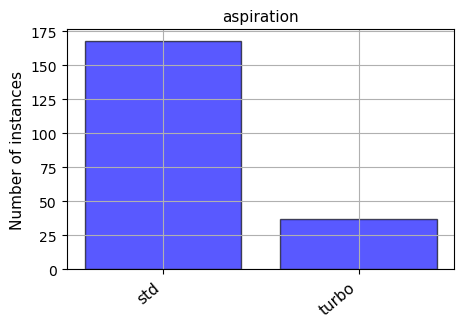

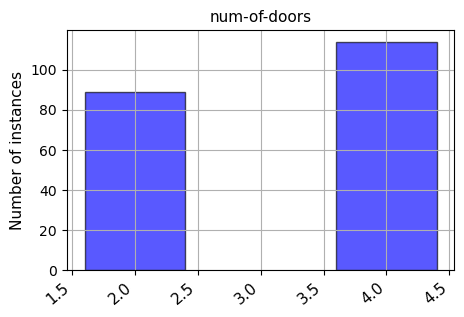

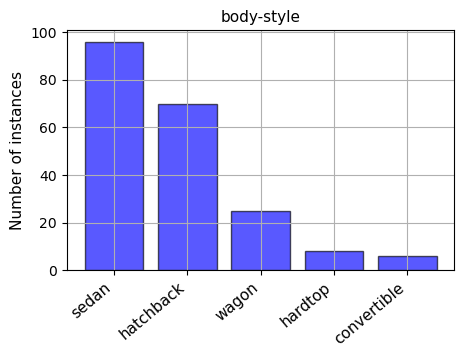

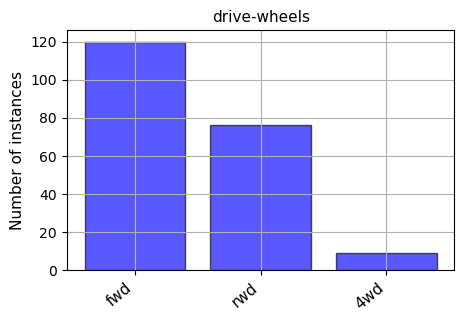

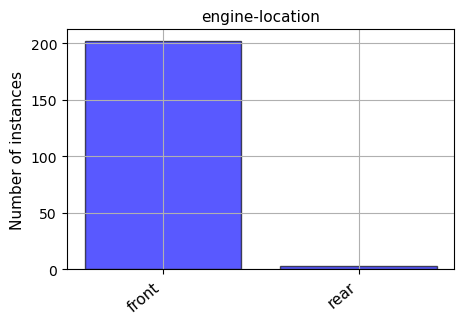

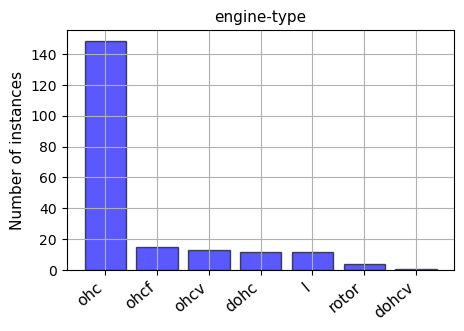

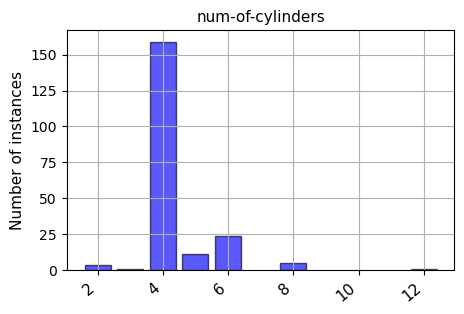

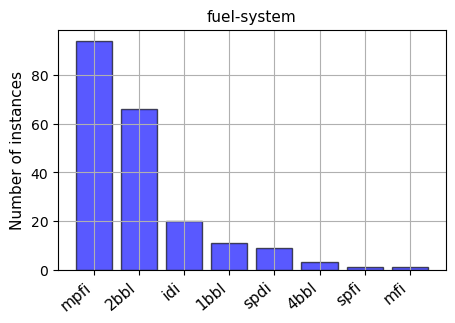

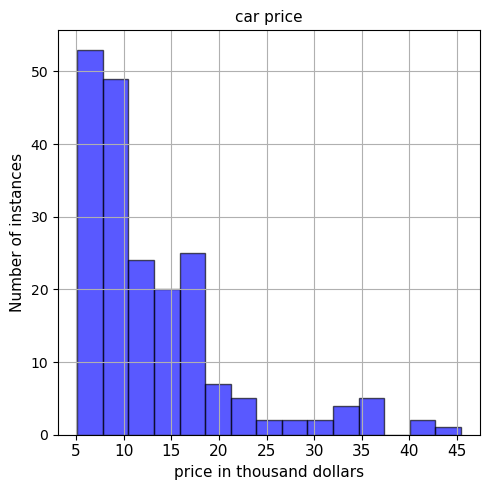

In [131]:
my_figsize = (5,5)

nominals = [2, 3, 4, 5, 6, 7, 8, 14, 15, 17]
counter =0
headers=list(df.columns.values)
for x in nominals:
    counter+=1
    name = headers[x]
    fig = plt.figure(figsize=my_figsize)
    my_counts = df[name].value_counts()
    plt.bar(x=my_counts.index, height=my_counts.values, color='blue', edgecolor='k', alpha=0.65)
    plt.title(name,fontsize=11)
    plt.ylabel("Number of instances",fontsize=11)
    plt.xticks(rotation=40,fontsize=11, ha="right")
    plt.grid()
    fig.subplots_adjust(bottom=0.4) 
    plt.savefig("car_nom{0}.pdf".format(counter))
    



fig = plt.figure(figsize=(5,5))
plt.hist(df['price']/1e3,bins=15, color='blue', edgecolor='k', alpha=0.65)
plt.title("car price",fontsize=11)
plt.ylabel("Number of instances",fontsize=11)
plt.xlabel("price in thousand dollars",fontsize=11)
plt.xticks(rotation=0,fontsize=11)
plt.tight_layout()
plt.grid()
plt.savefig("car_price.pdf")

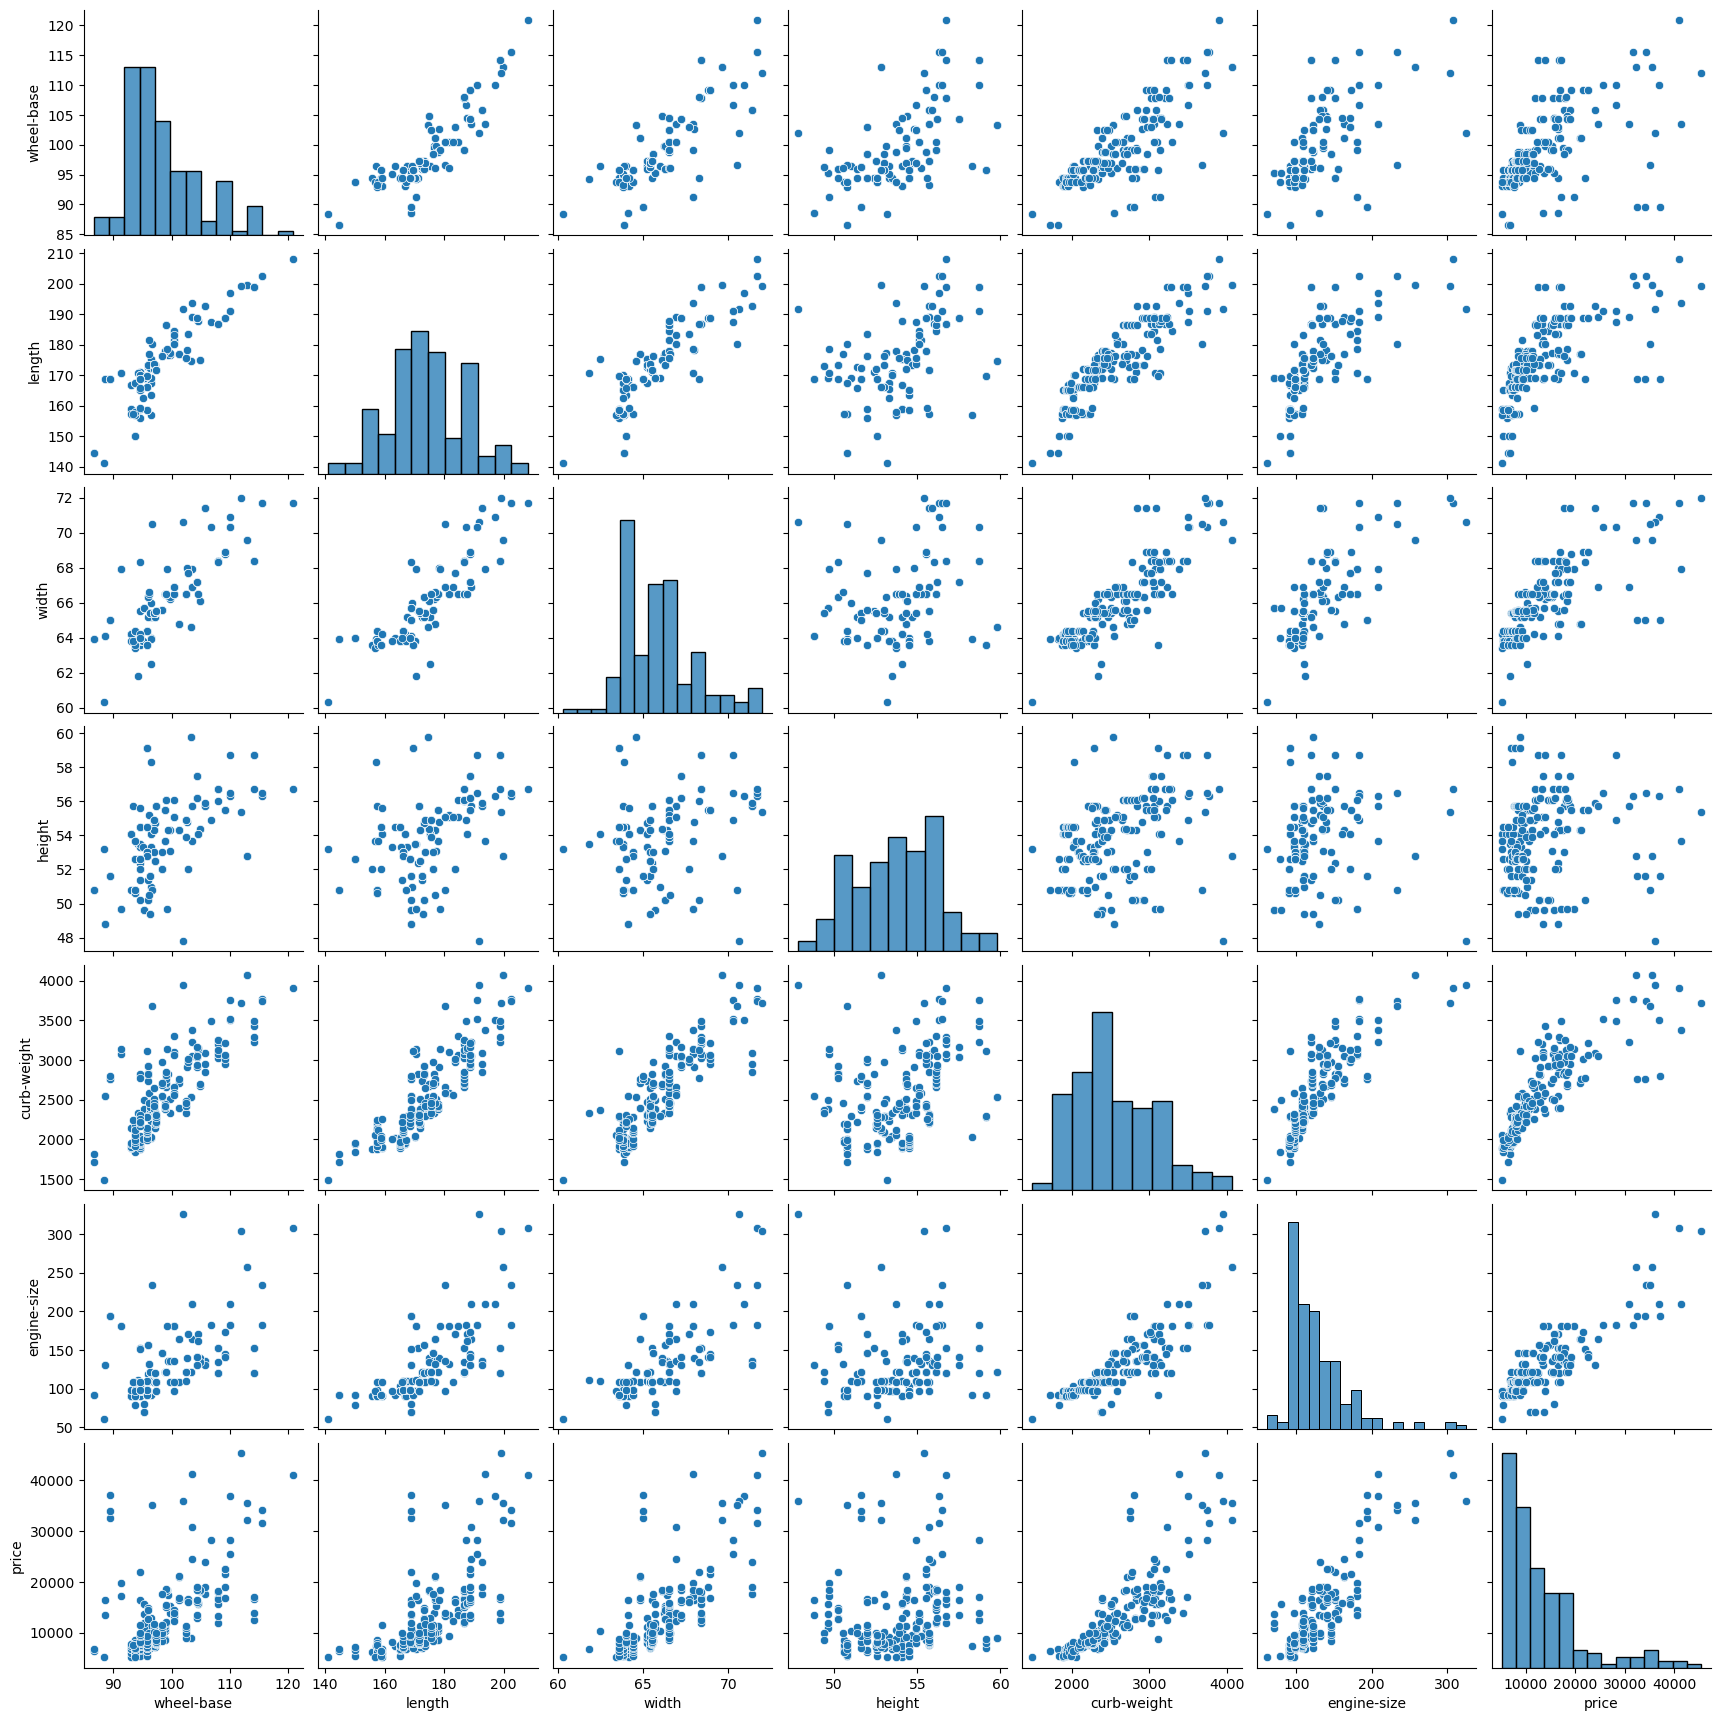

In [177]:
#pairplot based on car size attributes
df_delete= df
#df_delete['price'] = df_delete['price'].replace('?',np.nan)
df_delete['price'] = pd.to_numeric(df_delete['price'])
df_delete = df_delete[df_delete['price'].notna()]
#symboling is left out because it looks more categorical
ax = sns.pairplot(df_delete[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "price"]],palette='dark')


<Figure size 2000x2000 with 0 Axes>

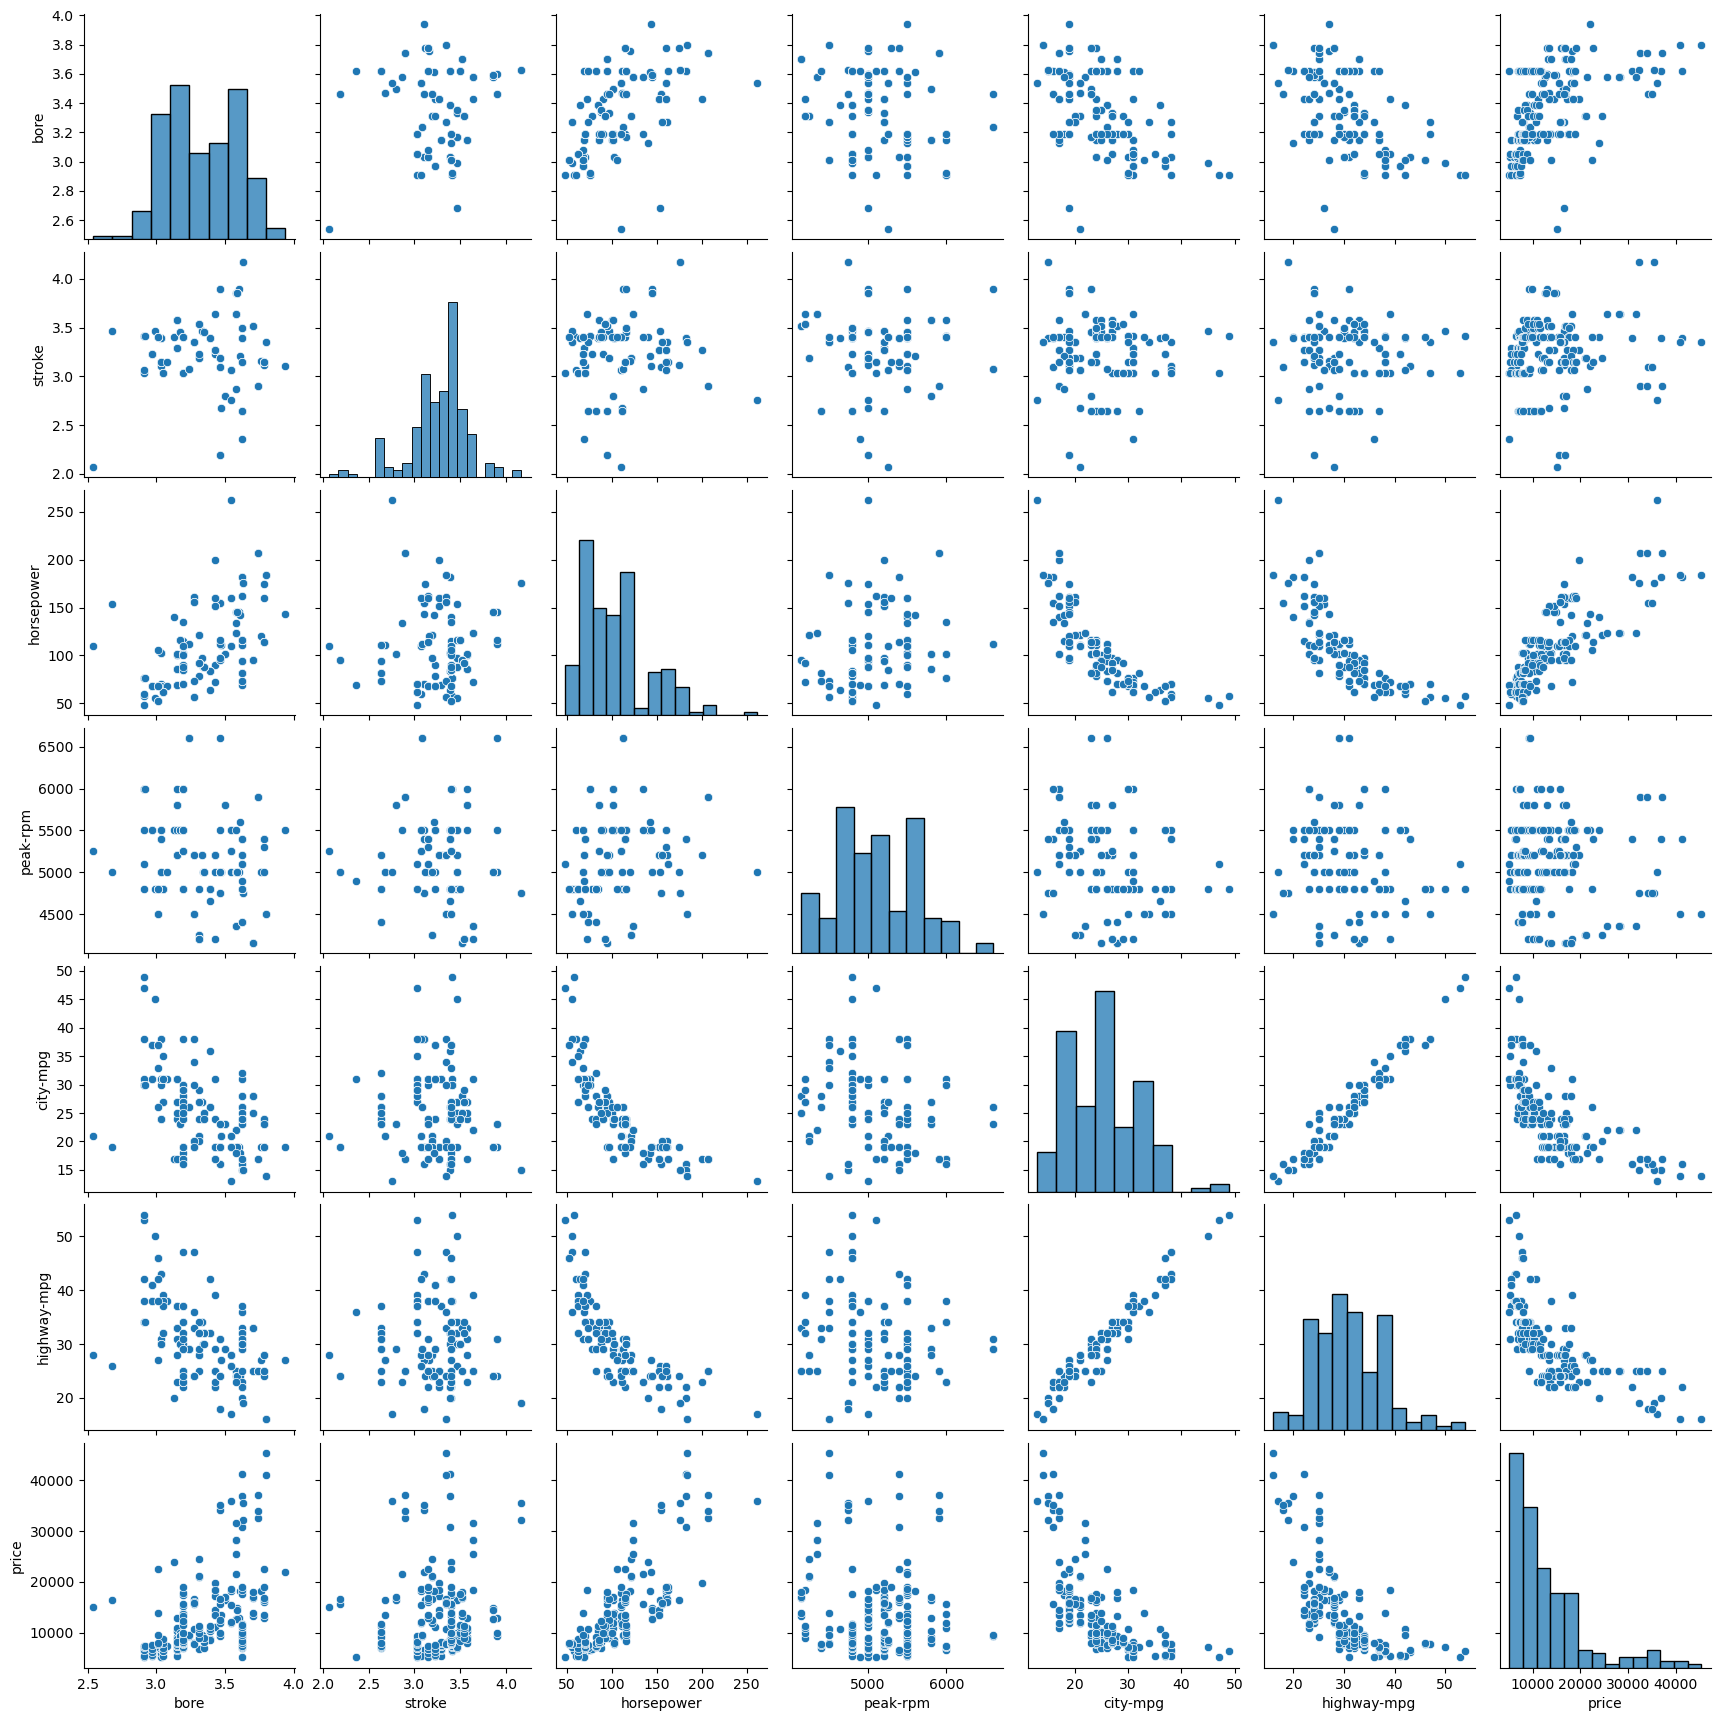

In [184]:
#pairplot based in enigne size attributes
df_num = df_delete[["bore", "stroke", "horsepower","peak-rpm", "city-mpg", "highway-mpg","price"]]
imputer = KNNImputer(n_neighbors=1)
df_num =pd.DataFrame(imputer.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
plt.figure(figsize=(20,20))
ax = sns.pairplot(df_num[["bore", "stroke", "horsepower","peak-rpm", "city-mpg", "highway-mpg","price"]],palette='blue') 

<AxesSubplot:>

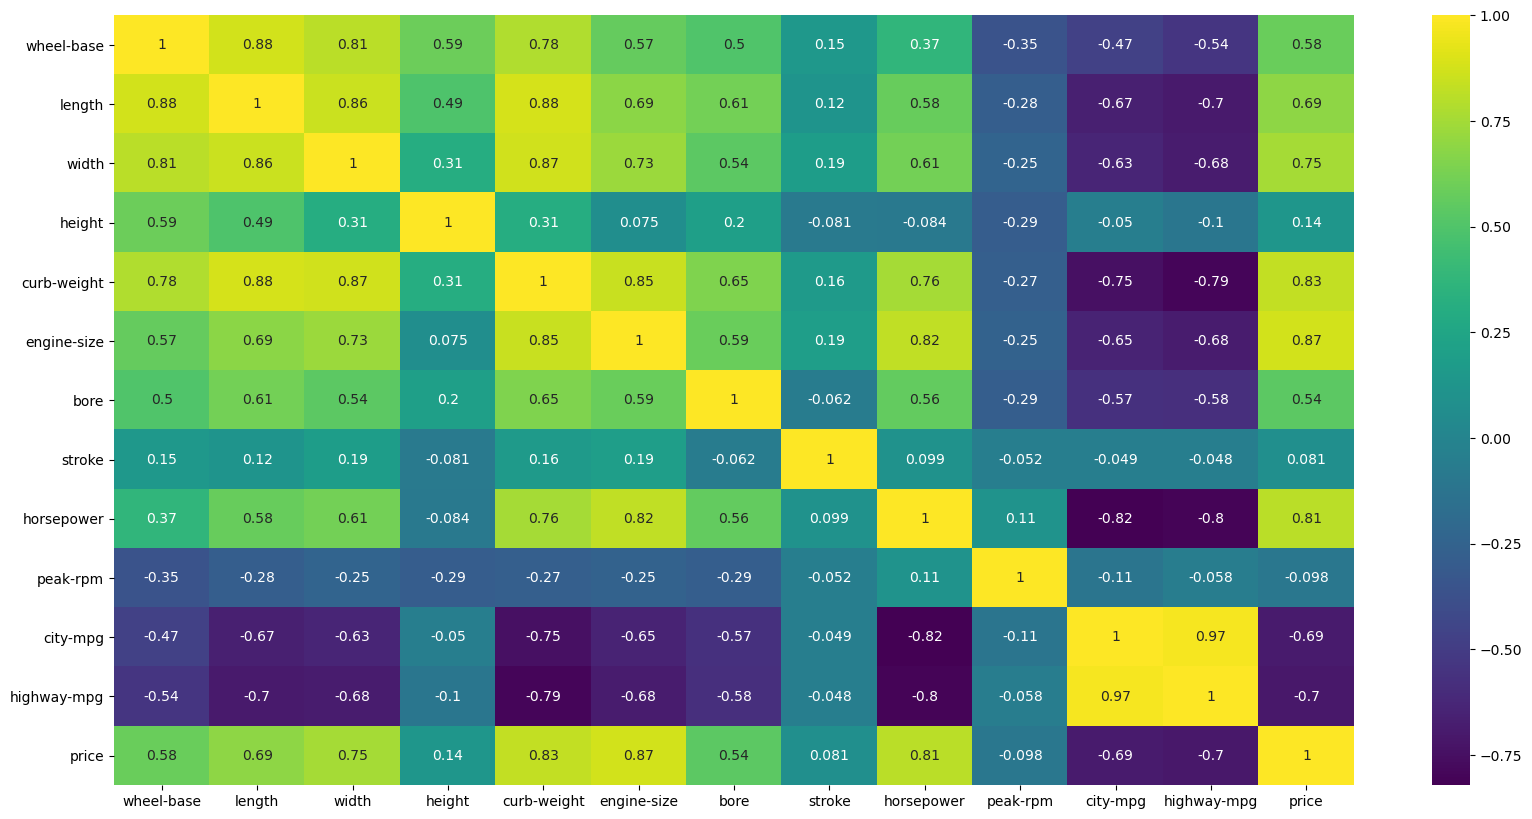

In [179]:
df_num = df_delete[["wheel-base", "length", "width", "height", "curb-weight", "engine-size","bore", "stroke", "horsepower","peak-rpm", "city-mpg", "highway-mpg","price"]]
imputer = KNNImputer(n_neighbors=1)
df_num =pd.DataFrame(imputer.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),annot=True,cmap='viridis')

In [181]:
# Create dummy variables for all categorical data (including ordinal)
df = pd.get_dummies(df, columns=["make", "fuel-type", "num-of-doors","fuel-system", "aspiration",  "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders"  ], prefix=["make", "fuel_type", "doors", "fuel_sys", "aspi",  "body", "drive", "eng_loc", "eng_type", "cylinders"], drop_first= True)

df.head()

symboling normalized-losses  wheel-base  length  width  height  \
0          3               NaN        88.6   168.8   64.1    48.8   
1          3               NaN        88.6   168.8   64.1    48.8   
2          1               NaN        94.5   171.2   65.5    52.4   
3          2               164        99.8   176.6   66.2    54.3   
4          2               164        99.4   176.6   66.4    54.3   

   curb-weight  engine-size  bore stroke  ...  eng_type_ohc eng_type_ohcf  \
0         2548          130  3.47   2.68  ...             0             0   
1         2548          130  3.47   2.68  ...             0             0   
2         2823          152  2.68   3.47  ...             0             0   
3         2337          109  3.19    3.4  ...             1             0   
4         2824          136  3.19    3.4  ...             1             0   

  eng_type_ohcv  eng_type_rotor  cylinders_five  cylinders_four  \
0             0               0               0               1   
1             0               0               0               1   
2             1               0               0               0   
3             0               0               0               1   
4             0               0               1               0   

   cylinders_six  cylinders_three  cylinders_twelve  cylinders_two  
0              0                0                 0              0  
1              0                0                 0              0  
2              1                0                 0              0  
3              0                0                 0              0  
4              0                0                 0              0  

[5 rows x 66 columns]

In [182]:
# Impute the missing values with KNN imputer (4 nearest neighbours)
df_imputed3NN = df
imputer = KNNImputer(n_neighbors=3)
df_imputed3NN =pd.DataFrame(imputer.fit_transform(df_imputed3NN), index=df.index, columns=df.columns)
print(df_imputed3NN)

     symboling  normalized-losses  wheel-base  length  width  height  \
0          3.0              127.0        88.6   168.8   64.1    48.8   
1          3.0              144.0        88.6   168.8   64.1    48.8   
2          1.0              144.0        94.5   171.2   65.5    52.4   
3          2.0              164.0        99.8   176.6   66.2    54.3   
4          2.0              164.0        99.4   176.6   66.4    54.3   
..         ...                ...         ...     ...    ...     ...   
200       -1.0               95.0       109.1   188.8   68.9    55.5   
201       -1.0               95.0       109.1   188.8   68.8    55.5   
202       -1.0               95.0       109.1   188.8   68.9    55.5   
203       -1.0               95.0       109.1   188.8   68.9    55.5   
204       -1.0               95.0       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  bore  stroke  ...  eng_type_ohc  eng_type_ohcf  \
0         2548.0        130.0  3.47    2.68  ...      

<AxesSubplot:>

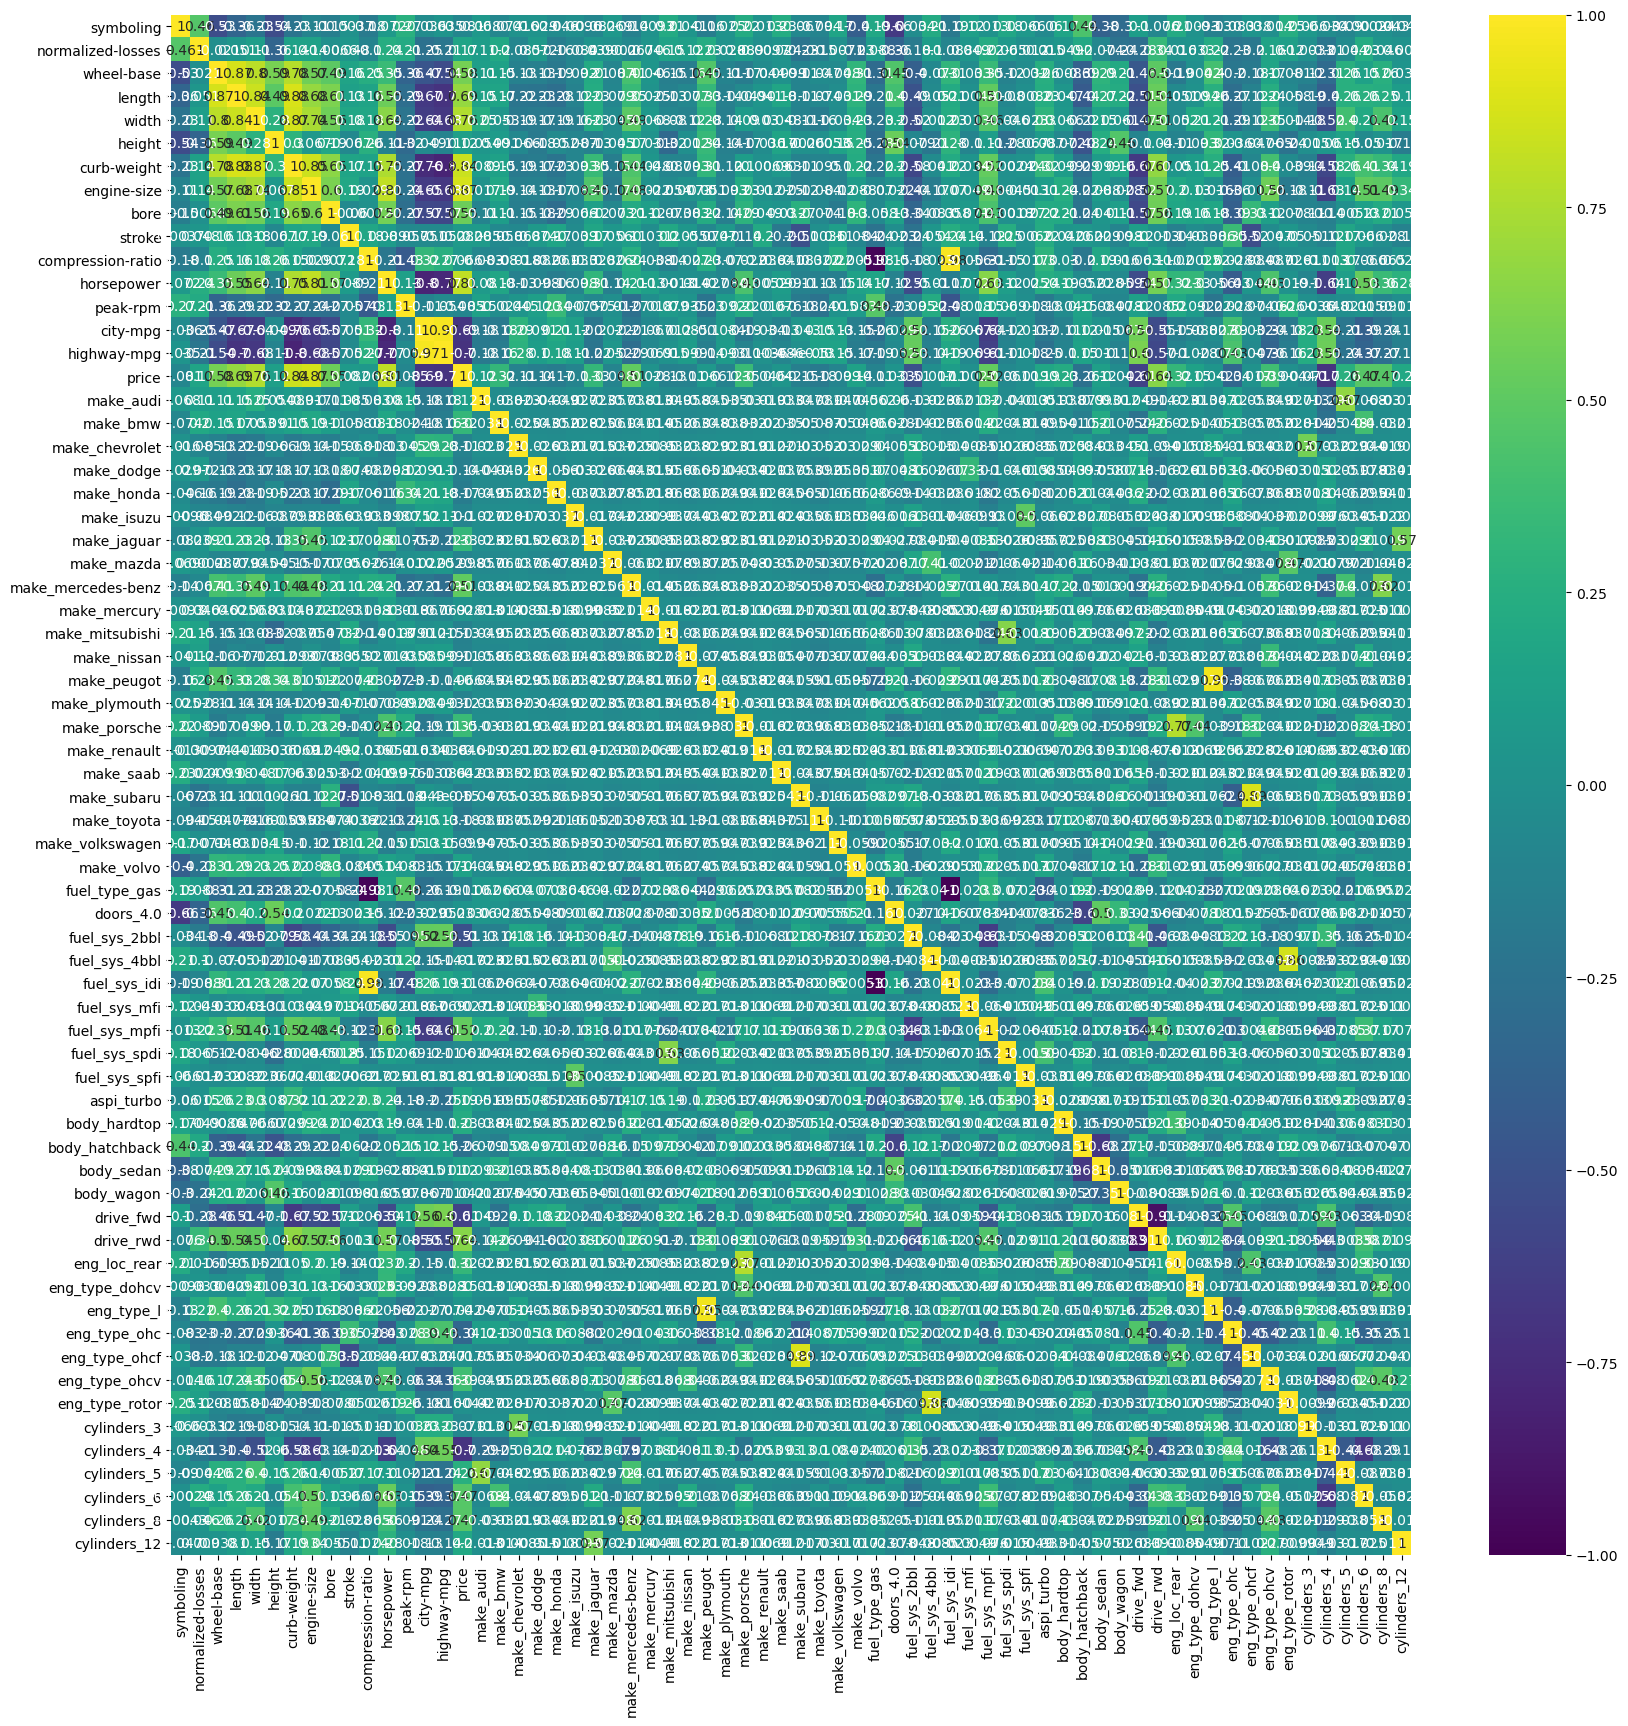

In [145]:
plt.figure(figsize=(20,20))
sns.heatmap(df_imputed3NN.corr(),annot=True,cmap='viridis')

In [76]:
#Cell to check out different columns 
df_imputed3NN.iloc[:,35:66].describe()

make_volkswagen  make_volvo  fuel_type_gas   doors_4.0  fuel_sys_2bbl  \
count       205.000000  205.000000     205.000000  205.000000     205.000000   
mean          0.058537    0.053659       0.902439    0.556098       0.321951   
std           0.235330    0.225894       0.297446    0.498059       0.468368   
min           0.000000    0.000000       0.000000    0.000000       0.000000   
25%           0.000000    0.000000       1.000000    0.000000       0.000000   
50%           0.000000    0.000000       1.000000    1.000000       0.000000   
75%           0.000000    0.000000       1.000000    1.000000       1.000000   
max           1.000000    1.000000       1.000000    1.000000       1.000000   

       fuel_sys_4bbl  fuel_sys_idi  fuel_sys_mfi  fuel_sys_mpfi  \
count     205.000000    205.000000    205.000000     205.000000   
mean        0.014634      0.097561      0.004878       0.458537   
std         0.120377      0.297446      0.069843       0.499498   
min         0.000000      0.000000      0.000000       0.000000   
25%         0.000000      0.000000      0.000000       0.000000   
50%         0.000000      0.000000      0.000000       0.000000   
75%         0.000000      0.000000      0.000000       1.000000   
max         1.000000      1.000000      1.000000       1.000000   

       fuel_sys_spdi  ...  eng_type_ohc  eng_type_ohcf  eng_type_ohcv  \
count     205.000000  ...    205.000000     205.000000     205.000000   
mean        0.043902  ...      0.721951       0.073171       0.063415   
std         0.205380  ...      0.449134       0.261054       0.244304   
min         0.000000  ...      0.000000       0.000000       0.000000   
25%         0.000000  ...      0.000000       0.000000       0.000000   
50%         0.000000  ...      1.000000       0.000000       0.000000   
75%         0.000000  ...      1.000000       0.000000       0.000000   
max         1.000000  ...      1.000000       1.000000       1.000000   

       eng_type_rotor  cylinders_3  cylinders_4  cylinders_5  cylinders_6  \
count      205.000000   205.000000   205.000000   205.000000   205.000000   
mean         0.019512     0.004878     0.775610     0.053659     0.117073   
std          0.138655     0.069843     0.418201     0.225894     0.322294   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%          0.000000     0.000000     1.000000     0.000000     0.000000   
50%          0.000000     0.000000     1.000000     0.000000     0.000000   
75%          0.000000     0.000000     1.000000     0.000000     0.000000   
max          1.000000     1.000000     1.000000     1.000000     1.000000   

       cylinders_8  cylinders_12  
count   205.000000    205.000000  
mean      0.024390      0.004878  
std       0.154635      0.069843  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       1.000000      1.000000  

[8 rows x 31 columns]

In [183]:
list(df_imputed3NN.columns.values)

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'fuel_type_gas',
 'doors_two',
 'fuel_sys_2bbl',
 'fuel_sys_4bbl',
 'fuel_sys_idi',
 'fuel_sys_mfi',
 'fuel_sys_mpfi',
 'fuel_sys_spdi',
 'fuel_sys_spfi',
 'aspi_turbo',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'drive_fwd',
 'drive_rwd',
 'eng_loc_rear',
 'eng_type_dohcv',
 'eng_type_l',
 'eng_type_ohc',
 'eng_type_ohcf',
 'eng_type_ohcv',
 'eng_type_rotor',
 'cylinders_five',
 'cylinders_four',
 'c

In [185]:
# Pre-processing, normalized losses and delete the instances without a price. 
df_delete= df
df_delete['price'] = pd.to_numeric(df_delete['price'])
df_delete = df_delete[df_delete['price'].notna()]
df_delete.describe()

symboling  wheel-base      length       width      height  \
count  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     0.840796   98.797015  174.200995   65.889055   53.766667   
std      1.254802    6.066366   12.322175    2.101471    2.447822   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.800000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.500000   66.600000   55.500000   
max      3.000000  120.900000  208.100000   72.000000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  \
count   201.000000   201.000000         201.000000  201.000000   201.000000   
mean   2555.666667   126.875622          10.164279   25.179104    30.686567   
std     517.296727    41.546834           4.004965    6.423220     6.815150   
min    1488.000000    61.000000           7.000000   13.000000    16.000000   
25%    2169.000000    98.000000           8.600000   19.000000    25.000000   
50%    2414.000000   120.000000           9.000000   24.000000    30.000000   
75%    2926.000000   141.000000           9.400000   30.000000    34.000000   
max    4066.000000   326.000000          23.000000   49.000000    54.000000   

       ...  eng_type_ohc  eng_type_ohcf  eng_type_ohcv  eng_type_rotor  \
count  ...    201.000000     201.000000     201.000000      201.000000   
mean   ...      0.721393       0.074627       0.064677        0.019900   
std    ...      0.449433       0.263444       0.246568        0.140007   
min    ...      0.000000       0.000000       0.000000        0.000000   
25%    ...      0.000000       0.000000       0.000000        0.000000   
50%    ...      1.000000       0.000000       0.000000        0.000000   
75%    ...      1.000000       0.000000       0.000000        0.000000   
max    ...      1.000000       1.000000       1.000000        1.000000   

       cylinders_five  cylinders_four  cylinders_six  cylinders_three  \
count      201.000000      201.000000     201.000000       201.000000   
mean         0.049751        0.781095       0.119403         0.004975   
std          0.217973        0.414537       0.325072         0.070535   
min          0.000000        0.000000       0.000000         0.000000   
25%          0.000000        1.000000       0.000000         0.000000   
50%          0.000000        1.000000       0.000000         0.000000   
75%          0.000000        1.000000       0.000000         0.000000   
max          1.000000        1.000000       1.000000         1.000000   

       cylinders_twelve  cylinders_two  
count        201.000000     201.000000  
mean           0.004975       0.019900  
std            0.070535       0.140007  
min            0.000000       0.000000  
25%            0.000000       0.000000  
50%            0.000000       0.000000  
75%            0.000000       0.000000  
max            1.000000       1.000000  

[8 rows x 61 columns]

In [186]:
df_delete=df_delete.drop(['normalized-losses'], axis=1)

In [187]:
df_delete.head()

symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0          3        88.6   168.8   64.1    48.8         2548          130   
1          3        88.6   168.8   64.1    48.8         2548          130   
2          1        94.5   171.2   65.5    52.4         2823          152   
3          2        99.8   176.6   66.2    54.3         2337          109   
4          2        99.4   176.6   66.4    54.3         2824          136   

   bore stroke  compression-ratio  ... eng_type_ohc eng_type_ohcf  \
0  3.47   2.68                9.0  ...            0             0   
1  3.47   2.68                9.0  ...            0             0   
2  2.68   3.47                9.0  ...            0             0   
3  3.19    3.4               10.0  ...            1             0   
4  3.19    3.4                8.0  ...            1             0   

   eng_type_ohcv  eng_type_rotor  cylinders_five  cylinders_four  \
0              0               0               0               1   
1              0               0               0               1   
2              1               0               0               0   
3              0               0               0               1   
4              0               0               1               0   

   cylinders_six  cylinders_three  cylinders_twelve  cylinders_two  
0              0                0                 0              0  
1              0                0                 0              0  
2              1                0                 0              0  
3              0                0                 0              0  
4              0                0                 0              0  

[5 rows x 65 columns]

In [82]:
#impute with the median
num_col = [ 'bore',  'stroke', 'horsepower', 'peak-rpm']
for col in num_col:
    df_delete[col] = df_delete[col].replace('?', np.nan)
    df_delete[col] = pd.to_numeric(df_delete[col])
    df_delete[col].fillna(df_delete[col].median(), inplace=True)

# Pre-processing function

In [194]:
def preprocessing(dataframe_nr, df, train_index, test_index):
    if dataframe_nr == 1:
        df_train_imputed3NN = df.iloc[train_index]
        imputer = KNNImputer(n_neighbors=3)
        df_train_imputed3NN =pd.DataFrame(imputer.fit_transform(df_train_imputed3NN), index=train_index, columns=df.columns)
        df_imputed3NN = pd.DataFrame(imputer.fit_transform(df), index=df.index, columns=df.columns)
        df_imputed3NN_test = df_imputed3NN.iloc[test_index]
        
        attrs = list(df.columns.values)
        feed = df_train_imputed3NN[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_imputed3NN_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
        
        
    elif dataframe_nr==2:
    # delete rows with no price, and column normalized losses.
        df_delete= df 
        df_delete_train = df.iloc[train_index]
        imputer = KNNImputer(n_neighbors=3)
        df_delete_train =pd.DataFrame(imputer.fit_transform(df_delete_train), index=train_index, columns=df_delete.columns)
        df_delete = pd.DataFrame(imputer.fit_transform(df), index=df_delete.index, columns=df_delete.columns)
        df_delete_test = df_delete.iloc[test_index]
        
        attrs = list(df_delete.columns.values)
        feed = df_delete_train[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_delete_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
        
        
    elif dataframe_nr==3:
        df_delete = df
        num_col = [ 'bore',  'stroke', 'horsepower', 'peak-rpm']
        for col in num_col:
            df_delete[col] = df_delete[col].replace('?', np.nan)
            df_delete[col] = pd.to_numeric(df_delete[col])
            df_delete_train= df_delete.iloc[train_index]
            df_delete[col].fillna(df_delete_train[col].median(), inplace=True)
            df_delete_train[col].fillna(df_delete_train[col].median(), inplace=True)
        
        imputer = KNNImputer(n_neighbors=1)
        df_delete_train = pd.DataFrame(imputer.fit_transform(df_delete_train), index=df_delete_train.index, columns=df_delete.columns)
        df_delete = pd.DataFrame(imputer.fit_transform(df_delete), index=df_delete.index, columns=df_delete.columns)
        df_delete_test = df_delete.iloc[test_index]
        
        attrs = list(df_delete.columns.values)
        feed = df_delete_train[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_delete_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
    
    elif dataframe_nr==4:
        df_delete = df
        num_col = [ 'bore',  'stroke', 'horsepower', 'peak-rpm']
        for col in num_col:
            df_delete[col] = df_delete[col].replace('?', np.nan)
            df_delete[col] = pd.to_numeric(df_delete[col])
            df_delete_train= df_delete.iloc[train_index]
            df_delete[col].fillna(df_delete_train[col].mean(), inplace=True)
            df_delete_train[col].fillna(df_delete_train[col].mean(), inplace=True)
        
        imputer = KNNImputer(n_neighbors=1)
        df_delete_train = pd.DataFrame(imputer.fit_transform(df_delete_train), index=df_delete_train.index, columns=df_delete.columns)
        df_delete = pd.DataFrame(imputer.fit_transform(df_delete), index=df_delete.index, columns=df_delete.columns)
        df_delete_test = df_delete.iloc[test_index]
        
        attrs = list(df_delete.columns.values)
        feed = df_delete_train[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_delete_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
    return X_train, y_train, X_test, y_test


# Find best settings for own algorithms

In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
attrs = list(df_train.columns.values)
feed = df_train[attrs]
X_train = np.array(feed.drop('price',axis = 1))
y_train = np.array(feed['price'])


attrs = list(df_test.columns.values)
feed = df_test[attrs]
X_test = np.array(feed.drop('price',axis = 1))
y_test = np.array(feed['price'])

def create_m5_grid(X_train, y_train[:,None], grid=[], **kwargs):
    clf = GridSearchCV(M5regressor(), grid, refit = "r2_score", verbose = 3,n_jobs=None, cv=5)
    clf.fit(X_train, y_train)
    print(clf.best_params_)

param_grid = {'smoothing': [True, False],
              'pruning': [True, False],
              'optimize_models': [True, False],
              'split_function': ["RMS"],
              'n_attr_leaf':[4, 6, 8,10],
              'max_depth':[2],
              'k':[15]}  

create_m5_grid(X_train, y_train[:,None], grid = param_grid)



Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END k=15, max_depth=2, n_attr_leaf=4, optimize_models=True, pruning=True, smoothing=True, split_function=RMS; total time=   0.0s
[CV 2/5] END k=15, max_depth=2, n_attr_leaf=4, optimize_models=True, pruning=True, smoothing=True, split_function=RMS; total time=   0.0s
[CV 3/5] END k=15, max_depth=2, n_attr_leaf=4, optimize_models=True, pruning=True, smoothing=True, split_function=RMS; total time=   0.0s
[CV 4/5] END k=15, max_depth=2, n_attr_leaf=4, optimize_models=True, pruning=True, smoothing=True, split_function=RMS; total time=   0.0s
[CV 5/5] END k=15, max_depth=2, n_attr_leaf=4, optimize_models=True, pruning=True, smoothing=True, split_function=RMS; total time=   0.0s
[CV 1/5] END k=15, max_depth=2, n_attr_leaf=4, optimize_models=True, pruning=True, smoothing=False, split_function=RMS; total time=   0.0s
[CV 2/5] END k=15, max_depth=2, n_attr_leaf=4, optimize_models=True, pruning=True, smoothing=False, split_fun

TypeError: can only concatenate str (not "float") to str

# Run different scenarios and compare

In [24]:
#Create X and y for X no deletion of values, imputed with 4nn

attrs = list(df_imputed4NN.columns.values)
feed = df_imputed4NN[attrs]
X = np.array(feed.drop('price',axis = 1))
y = np.array(feed['price'])

In [55]:
print(X_train)
print(sum(y_test))

[[  3.   127.75  88.6  ...   0.     0.     0.  ]
 [  1.   131.75  94.5  ...   1.     0.     0.  ]
 [  2.   164.    99.8  ...   0.     0.     0.  ]
 ...
 [ -1.    95.   109.1  ...   0.     0.     0.  ]
 [ -1.    95.   109.1  ...   1.     0.     0.  ]
 [ -1.    95.   109.1  ...   1.     0.     0.  ]]
305980.0


In [236]:
# models on X_imputed
import warnings
warnings.filterwarnings('ignore')

#attrs = list(df.columns.values)
#feed = df[attrs]
#X = np.array(feed.drop('price',axis = 1))
#y = np.array(feed['price'])


#df = shuffle(df, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)
M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
#m5_matrix , const_matrix, const_sk_matrix, linear_matrix, random_matrix, extra_matrix = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()


# We split the data and apply the pre-processing

for train_index, test_index in kf.split(df):
        dataframe_nr=1
        
        #pre-processing according to dataframe_nr
        preprocessing(dataframe_nr, df, train_index, test_index)
        
        
        #M5 regressor tree own
        reg = M5regressor(smoothing=True, n_attr_leaf=4, max_depth=4,k=20.0,pruning=True,optimize_models=True,incremental_fit=True).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = 4, max_depth=8).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        #Constant regressor tree SKlearn
        const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=4, max_depth=8, random_state=42).fit(X_train, y_train)
        const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
        const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
        #Linear regression sklearn
        linear_regressor = LinearRegression().fit(X_train, y_train)
        linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
        linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
        # Random forrest regressor
        random_forest_regressor = RandomForestRegressor(max_depth=8, min_samples_split=4, random_state=42).fit(X_train, y_train)
        random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
        random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
        #Extra tree regressor
        extra_tree_regressor = ExtraTreeRegressor(max_depth=8, random_state=42).fit(X_train, y_train)
        extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
        extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))


m5_r2 = np.mean(M5regressor_r2_model)
cons_r2 = np.mean(const_regressor_r2)                                           
cons_sklearn_r2 = np.mean(const_regressor_sklearn_r2_model)   
linear_r2 = np.mean(linear_regressor_r2)
random_r2 =np.mean(random_forest_regressor_r2)
extra_r2= np.mean(extra_tree_r2)
m5_MAE = np.mean(M5regressor_MAE_model)
cons_MAE = np.mean(const_regressor_MAE)                                           
cons_sklearn_MAE = np.mean(const_regressor_sklearn_MAE_model)   
linear_MAE = np.mean(linear_regressor_MAE)
random_MAE =np.mean(random_forest_regressor_MAE)
extra_MAE = np.mean(extra_tree_MAE)
print("m5 r2", np.mean(M5regressor_r2_model), "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )
print("cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
print("linear r2", linear_r2, "MAE", linear_MAE)
print("random r2", random_r2, "MAE", random_MAE)
print("extra r2", extra_r2, "MAE", extra_MAE)

m5_matrix= pd.DataFrame([[m5_r2,m5_MAE]], columns= ["R2", "MAE"])
const_matrix= pd.DataFrame([[cons_r2, cons_MAE]], columns= ["R2", "MAE"])
const_sk_matrix= pd.DataFrame([[cons_sklearn_r2,cons_sklearn_MAE]], columns= ["R2", "MAE"])
linear_matrix= pd.DataFrame([[linear_r2,linear_MAE]], columns= ["R2", "MAE"])
random_matrix= pd.DataFrame([[random_r2,random_MAE]], columns= ["R2", "MAE"])
extra_matrix= pd.DataFrame([[extra_r2, extra_MAE]], columns= ["R2", "MAE"]) 


calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

calc split of 13 points
calc split of 10 points
calc split of 4 points
calc split of 6 points
calc split of 4 points
calc split of 56 points
calc split of 49 points
calc split of 41 points
calc split of 35 points
calc split of 33 points
calc split of 7 points
calc split of 5 points
calc split of 26 points
calc split of 4 points
calc split of 22 points
calc split of 6 points
calc split of 5 points
calc split of 4 points
calc split of 8 points
calc split of 5 points
calc split of 4 points
calc split of 7 points
calc split of 5 points
calc split of 4 points
calc split of 16 points
calc split of 5 points
calc split of 11 points
calc split of 8 points
calc split of 5 points
calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split o

calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 17 points
calc split of 14 points
calc split of 12 points
calc split of 11 points
calc split of 24 points
calc split of 4 points
calc split of 20 points
calc split of 10 points
calc split of 4 points
calc split of 6 points
calc split of 10 points
calc split of 8 points
calc split of 27 points
calc split of 24 points
calc split of 18 points
calc split of 14 points
calc split of 7 points
calc split of 7 points
calc split of 4 points
calc split of 6 points
calc split of 4 points
calc split of 45 points
calc split of 29 points
calc split of 28 points
calc split of 6 points
calc split of 5 points
calc split of 22 points
calc split of 17 points
calc split of 9 points
calc split of 8 points
calc split of 5 points
calc split of 4 points
calc split of 16 points
calc split of 13 points
calc split of 10 points
calc split of 4 points
calc split of 6 points
calc split of 4 points
calc spl

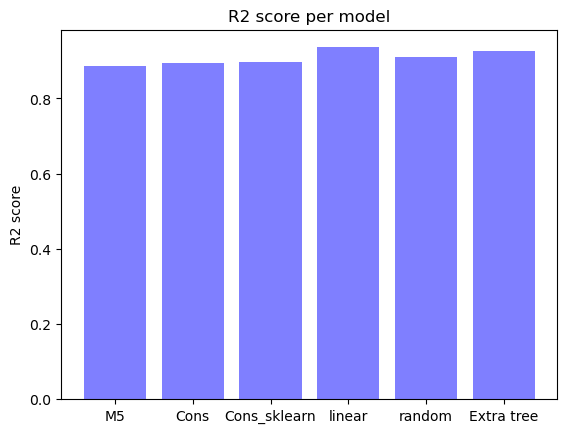

Text(0.5, 1.0, 'MAE score per model')

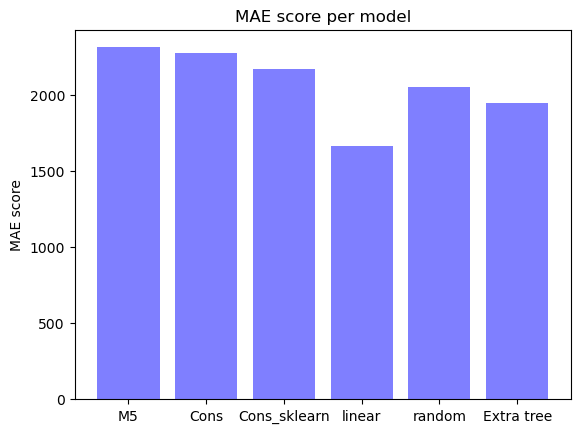

In [211]:
objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
r2Score = [m5_r2,cons_r2,cons_sklearn_r2,linear_r2,random_r2,extra_r2]

plt.bar(y_pos, r2Score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('R2 score')
plt.title('R2 score per model')
plt.show()

objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE,linear_MAE,random_MAE,extra_MAE]

plt.bar(y_pos, MAE_score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('MAE score')
plt.title('MAE score per model')

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

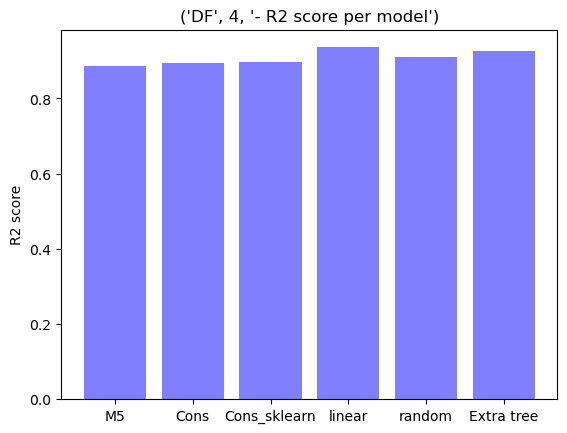

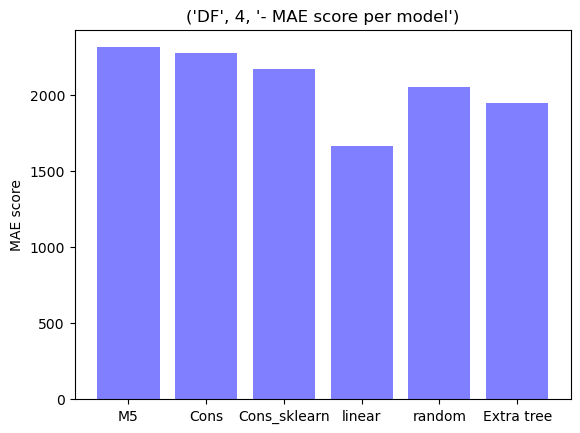

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

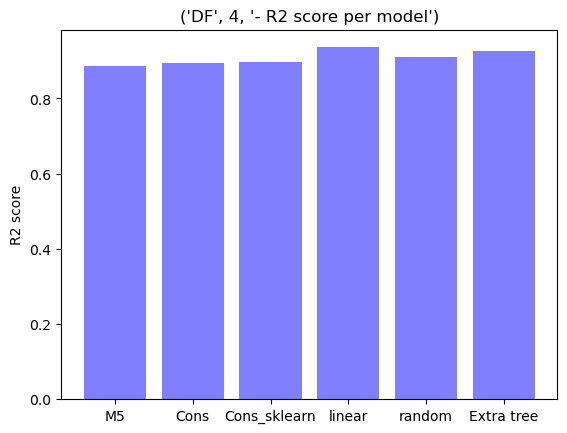

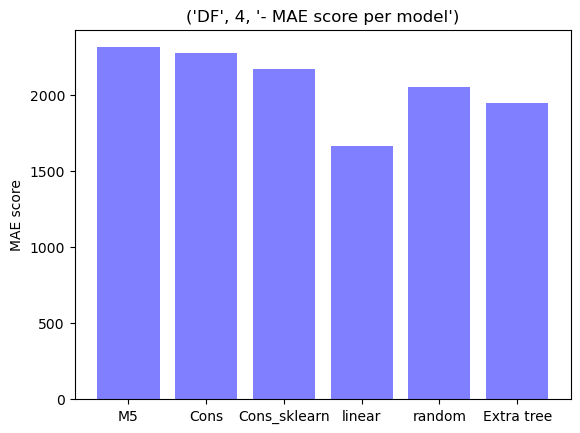

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

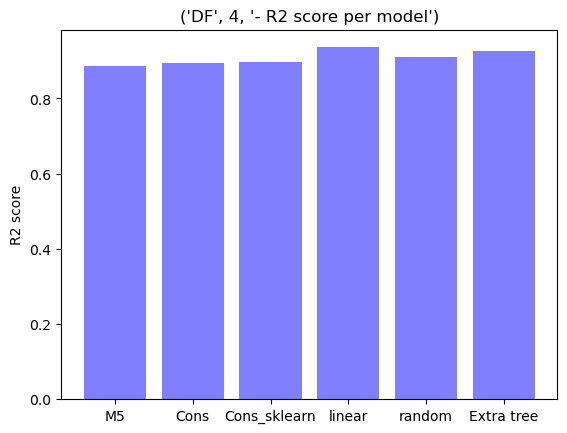

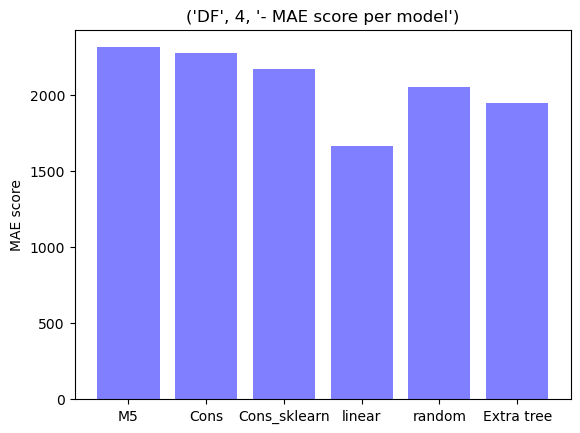

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

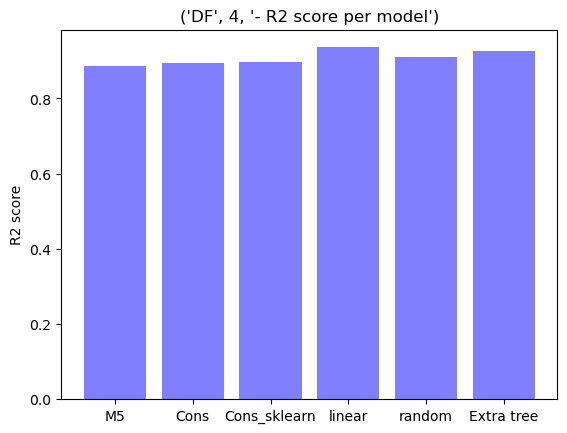

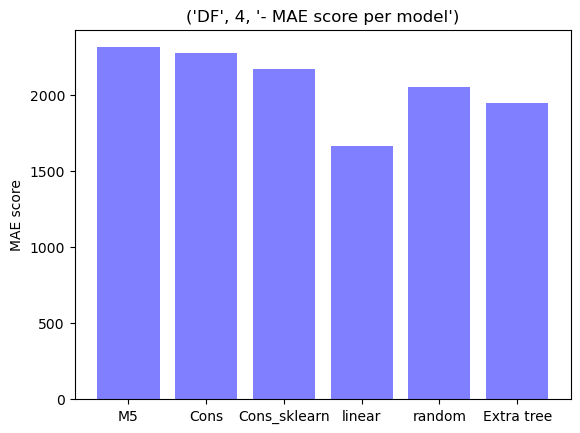

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

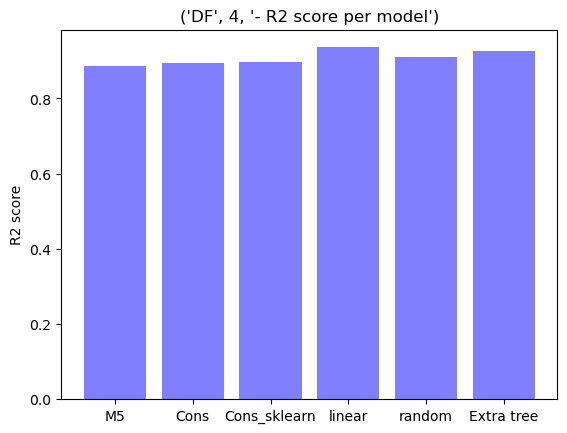

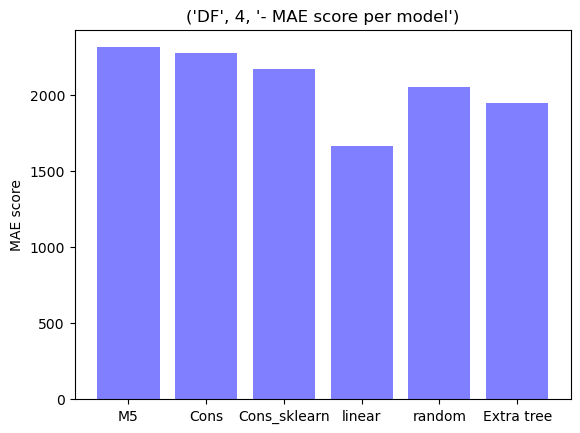

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

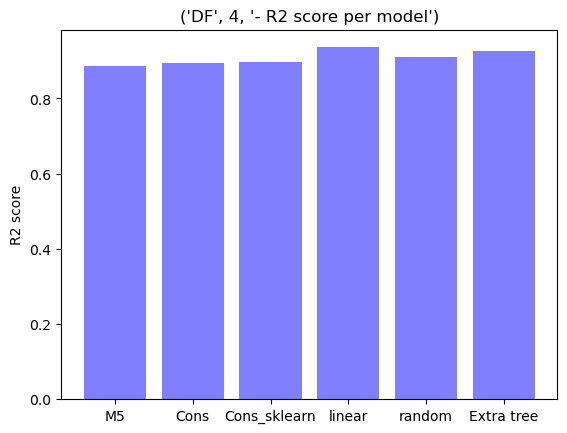

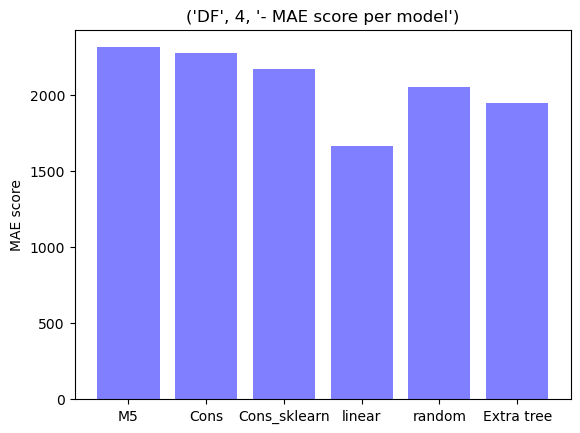

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

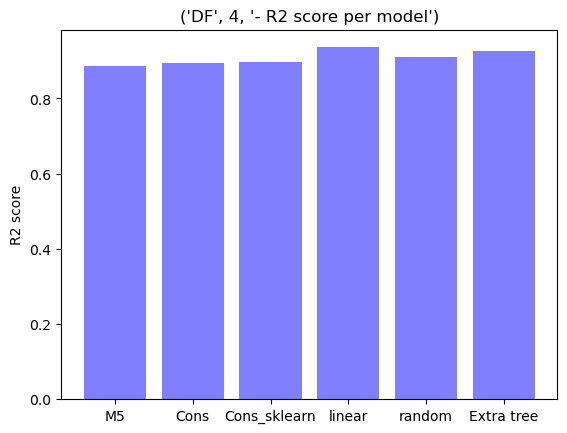

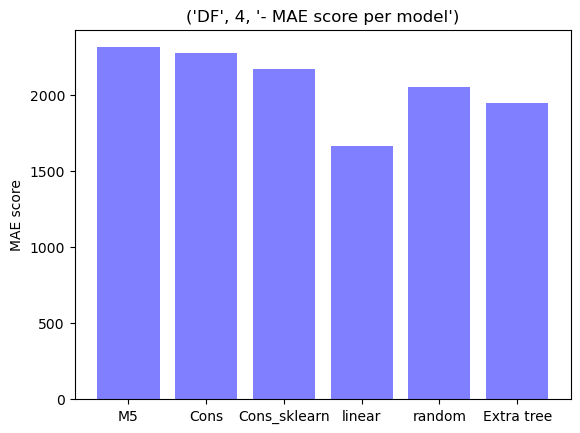

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

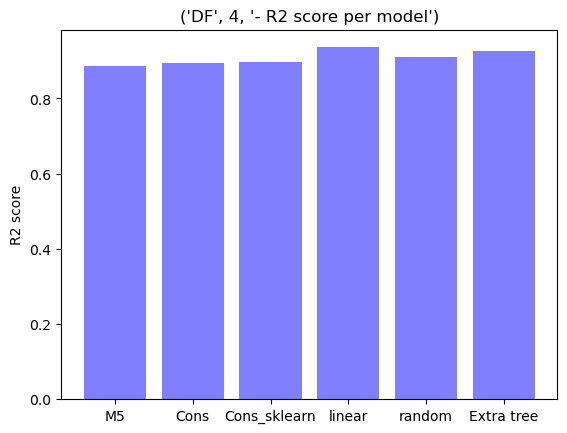

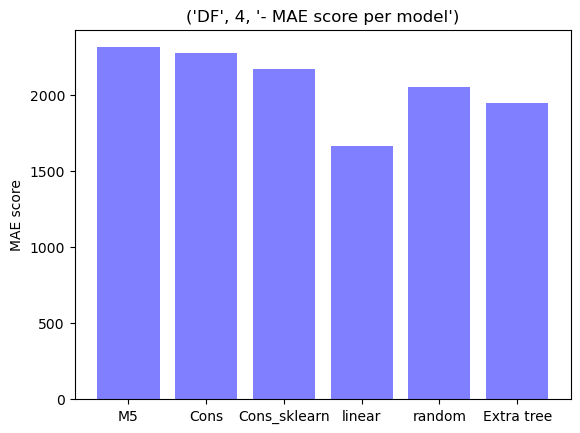

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

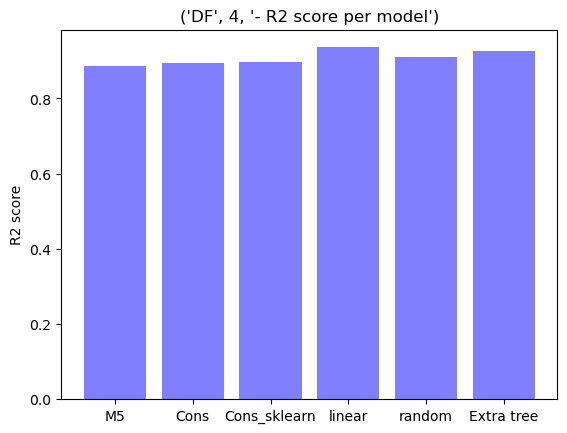

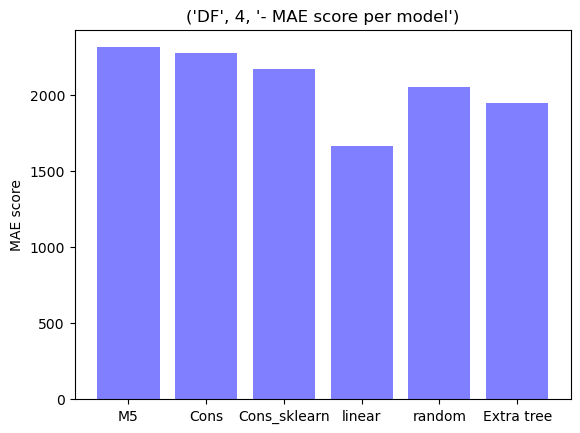

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

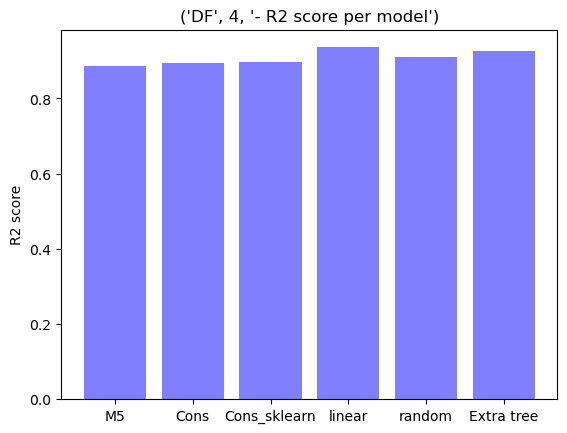

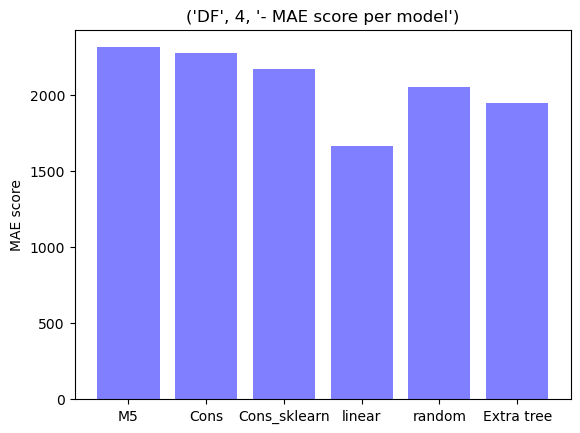

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 500x500 with 0 Axes>

In [237]:
# models on X_imputed
import warnings
warnings.filterwarnings('ignore')

#attrs = list(df.columns.values)
#feed = df[attrs]
#X = np.array(feed.drop('price',axis = 1))
#y = np.array(feed['price'])

# Pre-processing, normalized losses and delete the instances without a price. 
df_delete= df
df_delete['price'] = df_delete['price'].replace('?',np.nan)
df_delete['price'] = pd.to_numeric(df_delete['price'])
df_delete = df_delete[df_delete['price'].notna()]

df_delete=df_delete.drop(['normalized-losses'], axis=1)


kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df_delete)
M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
# We split the data and apply the pre-processing

for train_index, test_index in kf.split(df_delete):
        
        for dataframe_nr in [2, 3 ,4]:
        
            #pre-processing according to dataframe_nr
            preprocessing(dataframe_nr, df_delete, train_index, test_index)

            #M5 regressor tree own
            reg = M5regressor(smoothing=True, n_attr_leaf=4, max_depth=4,k=20.0,pruning=True,optimize_models=True,incremental_fit=True).fit(X_train, y_train[:,None])
            M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
            M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
            #Constant regressor tree own
            reg2 = Const_regressor(n_attr_leaf = 4, max_depth=8).fit(X_train, y_train[:,None])
            const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
            const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
            #Constant regressor tree SKlearn
            const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=4, max_depth=8, random_state=42).fit(X_train, y_train)
            const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
            const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
            #Linear regression sklearn
            linear_regressor = LinearRegression().fit(X_train, y_train)
            linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
            linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
            # Random forrest regressor
            random_forest_regressor = RandomForestRegressor(max_depth=8, min_samples_split=4, random_state=42).fit(X_train, y_train)
            random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
            random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
            #Extra tree
            extra_tree_regressor = ExtraTreeRegressor(max_depth=8, random_state=42).fit(X_train, y_train)
            extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
            extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))


        m5_r2 = np.mean(M5regressor_r2_model)
        cons_r2 = np.mean(const_regressor_r2)                                           
        cons_sklearn_r2 = np.mean(const_regressor_sklearn_r2_model)   
        linear_r2 = np.mean(linear_regressor_r2)
        random_r2 =np.mean(random_forest_regressor_r2)
        extra_r2= np.mean(extra_tree_r2)
        m5_MAE = np.mean(M5regressor_MAE_model)
        cons_MAE = np.mean(const_regressor_MAE)                                           
        cons_sklearn_MAE = np.mean(const_regressor_sklearn_MAE_model)   
        linear_MAE = np.mean(linear_regressor_MAE)
        random_MAE =np.mean(random_forest_regressor_MAE)
        extra_MAE = np.mean(extra_tree_MAE)
        print(dataframe_nr, "m5 r2", np.mean(M5regressor_r2_model), "MAE", m5_MAE )
        print(dataframe_nr, "cons r2",cons_r2, "MAE", cons_MAE  )
        print(dataframe_nr, "cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
        print(dataframe_nr, "linear r2", linear_r2, "MAE", linear_MAE)
        print(dataframe_nr, "random r2", random_r2, "MAE", random_MAE)
        print(dataframe_nr, "extra r2", extra_r2, "MAE", extra_MAE)
        

        objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
        y_pos = np.arange(len(objects))
        r2Score = [m5_r2,cons_r2,cons_sklearn_r2,linear_r2,random_r2,extra_r2]

        plt.bar(y_pos, r2Score, align='center', alpha=0.5, color='blue')
        plt.xticks(y_pos, objects)
        plt.ylabel('R2 score')
        text= 'DF', dataframe_nr, '- R2 score per model'
        plt.title(text)
        plt.show()

        objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
        y_pos = np.arange(len(objects))
        MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE,linear_MAE,random_MAE, extra_MAE]
        plt.bar(y_pos, MAE_score, align='center', alpha=0.5, color='blue')
        plt.xticks(y_pos, objects)
        plt.ylabel('MAE score')
        text1 ='DF', dataframe_nr, '- MAE score per model'
        plt.title(text1)
        plt.show()
        
        m5_matrix.append(pd.DataFrame([[m5_r2,m5_MAE]], columns= ["R2", "MAE"]))
        const_matrix.append(pd.DataFrame([[cons_r2, cons_MAE]], columns= ["R2", "MAE"]))
        const_sk_matrix.append(pd.DataFrame([[cons_sklearn_r2,cons_sklearn_MAE]], columns= ["R2", "MAE"]))
        linear_matrix.append(pd.DataFrame([[linear_r2,linear_MAE]], columns= ["R2", "MAE"]))
        random_matrix.append(pd.DataFrame([[random_r2,random_MAE]], columns= ["R2", "MAE"]))
        extra_matrix.append(pd.DataFrame([[extra_r2, extra_MAE]], columns= ["R2", "MAE"]))                    
        
#Graph perceptron hold out
vals      = np.arange(4)
plt.figure(figsize=(5,5))
plt.plot(vals, m5_matrix[:,0] , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, const_matrix[:,0] ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, const_sk_matrix[:,0], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_matrix[:,0],"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_matrix[:,0],"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_matrix[:,0],"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - pre-processing ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("Scenario",fontsize=12)
labels =np.arange(len(4))
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(4)
plt.figure(figsize=(5,5))
plt.plot(vals, m5_matrix[:,1] , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, const_matrix[:,1] ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, const_sk_matrix[:,1], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_matrix[:,1],"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_matrix[:,1],"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_matrix[:,1],"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("MAE - pre-processing ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Scenario",fontsize=12)
labels =np.arange(len(4))
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

In [216]:
#Graph perceptron hold out
vals      = np.arange(4)
plt.figure(figsize=(5,5))
plt.plot(vals, m5_matrix.iloc[:,0] , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, const_matrix.iloc[:,0] ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, const_sk_matrix.iloc[:,0], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_matrix.iloc[:,0],"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_matrix.iloc[:,0],"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_matrix.iloc[:,0],"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - pre-processing ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("Scenario",fontsize=12)
labels =np.arange(len(4))
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(4)
plt.figure(figsize=(5,5))
plt.plot(vals, m5_matrix.iloc[:,1] , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, const_matrix.iloc[:,1] ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, const_sk_matrix.iloc[:,1], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_matrix.iloc[:,1],"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_matrix.iloc[:,1],"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_matrix.iloc[:,1],"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("MAE - pre-processing ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Scenario",fontsize=12)
labels =np.arange(len(4))
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

AttributeError: 'list' object has no attribute 'iloc'

<Figure size 500x500 with 0 Axes>

In [243]:
m5_matrix= pd.conco(pd.DataFrame([[m5_r2,m5_MAE]], columns= ["R2", "MAE"]), ignore_index=True)
print(m5_matrix)

         R2          MAE
0  0.885142  2314.746267


In [244]:
print(pd.DataFrame([[m5_r2,m5_MAE]], columns= ["R2", "MAE"]))

         R2          MAE
0  0.885142  2314.746267


In [62]:
# models on X_imputed
import warnings
warnings.filterwarnings('ignore')

max_depth_range=[2,4,6,8]
#max_depth_range=[12]
#attrs = list(df.columns.values)
#feed = df[attrs]
#X = np.array(feed.drop('price',axis = 1))
#y = np.array(feed['price'])


#df = shuffle(df, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)
M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]

for max_depth in max_depth_range:
    
    for train_index, test_index in kf.split(df):
      
        # Impute the missing values with KNN imputer (4 nearest neighbours), no deleted cells
        df_train_imputed4NN = df.iloc[train_index]
        imputer = KNNImputer(n_neighbors=4)
        df_train_imputed4NN =pd.DataFrame(imputer.fit_transform(df_train_imputed4NN), index=train_index, columns=df.columns)
        df_imputed4NN = pd.DataFrame(imputer.fit_transform(df), index=df.index, columns=df.columns)
        df_imputed4NN_test = df_imputed4NN.iloc[test_index]
        
        attrs = list(df.columns.values)
        feed = df_train_imputed4NN[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_imputed4NN_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
        
        #M5 regressor tree own
        reg = M5regressor(smoothing=True, n_attr_leaf=4, max_depth=max_depth,k=20.0,pruning=True,optimize_models=True,incremental_fit=True).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = 4, max_depth=max_depth).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        #Constant regressor tree SKlearn
        const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=4, max_depth=max_depth, random_state=42).fit(X_train, y_train)
        const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
        const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
        #Linear regression sklearn
        linear_regressor = LinearRegression().fit(X_train, y_train)
        linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
        linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
        # Random forrest regressor
        random_forest_regressor = RandomForestRegressor(max_depth = max_depth, min_samples_split=4, random_state=42).fit(X_train, y_train)
        random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
        random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
        #Extra tree
        extra_tree_regressor = ExtraTreeRegressor(max_depth=max_depth, random_state=42).fit(X_train, y_train)
        extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
        extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))


    m5_r2.append(np.mean(M5regressor_r2_model))
    cons_r2.append(np.mean(const_regressor_r2))                                           
    cons_sklearn_r2.append(np.mean(const_regressor_sklearn_r2_model))   
    linear_r2.append(np.mean(linear_regressor_r2))
    random_r2.append(np.mean(random_forest_regressor_r2))
    extra_r2.append(np.mean(extra_tree_r2))
    m5_MAE.append(np.mean(M5regressor_MAE_model))
    cons_MAE.append(np.mean(const_regressor_MAE))                                           
    cons_sklearn_MAE.append(np.mean(const_regressor_sklearn_MAE_model))   
    linear_MAE.append(np.mean(linear_regressor_MAE))
    random_MAE.append(np.mean(random_forest_regressor_MAE))
    extra_MAE.append(np.mean(extra_tree_MAE))
print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )
print("cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
print("linear r2", linear_r2, "MAE", linear_MAE)
print("random r2", random_r2, "MAE", random_MAE)
print("extra r2", extra_r2, "MAE", extra_MAE)



calc split of 184 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2700.0
calc split of 114 points
dim, split 6 2293.0
calc split of 55 points
dim, split 4 68.8
calc split of 15 points
dim, split 10 8.1
calc split of 12 points
dim, split 1 118.25
calc split of 184 points
calc split of 169 points
calc split of 114 points
calc split of 55 points
calc split of 15 points
calc split of 12 points
calc split of 184 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2661.0
calc split of 114 points
dim, split 6 2289.0
calc split of 55 points
dim, split 4 68.8
calc split of 15 points
dim, split 14 17.0
calc split of 13 points
dim, split 4 72.3
calc split of 184 points
calc split of 169 points
calc split of 114 points
calc split of 55 points
calc split of 15 points
calc split of 13 points
calc split of 184 points
dim, split 7 183.0
calc split of 167 points
dim, split 6 2661.0
calc split of 111 points
dim, split 6 2293.0
calc split of 56 points
dim, split 4 68.8
calc sp

calc split of 184 points
dim, split 7 183.0
calc split of 166 points
dim, split 6 2548.0
calc split of 106 points
dim, split 11 84.0
calc split of 59 points
dim, split 3 165.6
calc split of 32 points
dim, split 9 3.29
calc split of 27 points
dim, split 2 98.8
calc split of 47 points
dim, split 14 30.0
calc split of 11 points
dim, split 6 2385.0
calc split of 36 points
dim, split 1 164.0
calc split of 60 points
dim, split 4 68.8
calc split of 53 points
dim, split 11 120.0
calc split of 32 points
dim, split 1 154.25
calc split of 21 points
dim, split 12 5000.0
calc split of 7 points
dim, split 6 3062.0
calc split of 4 points
dim, split 7 173.0
calc split of 18 points
dim, split 1 118.25
calc split of 6 points
dim, split 4 71.7
calc split of 4 points
dim, split 2 106.7
calc split of 12 points
dim, split 10 8.1
calc split of 4 points
dim, split 4 72.0
calc split of 8 points
dim, split 1 145.0
calc split of 7 points
dim, split 6 2800.0
prune right node at level 4
calc split of 184 points
ca

calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 27 points
dim, split 14 30.0
calc split of 45 points
dim, split 12 5500.0
calc split of 29 points
dim, split 2 94.3
calc split of 16 points
dim, split 8 3.34
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 1 162.5
calc split of 41 points
dim, split 11 160.0
calc split of 8 points
dim, split 6 2824.0
calc split of 7 points
dim, split 6 3086.0
calc split of 5 points
dim, split 7 173.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 5 53.7
calc split of 8 points
dim, split 1 122.0
calc split of 5 points
dim, split 6 2800.0
calc split of 185 points
calc split of 169 points
calc split of 113 points
calc split of 68 points
calc split of 41 points
calc split of 

calc split of 184 points
calc split of 167 points
calc split of 111 points
calc split of 64 points
calc split of 37 points
calc split of 25 points
calc split of 12 points
calc split of 13 points
calc split of 12 points
calc split of 4 points
calc split of 8 points
calc split of 27 points
calc split of 24 points
calc split of 17 points
calc split of 7 points
calc split of 47 points
calc split of 45 points
calc split of 8 points
calc split of 4 points
calc split of 4 points
calc split of 37 points
calc split of 35 points
calc split of 56 points
calc split of 48 points
calc split of 23 points
calc split of 21 points
calc split of 19 points
calc split of 25 points
calc split of 11 points
calc split of 7 points
calc split of 4 points
calc split of 14 points
calc split of 11 points
calc split of 8 points
calc split of 5 points
calc split of 4 points
calc split of 17 points
calc split of 5 points
calc split of 12 points
calc split of 4 points
calc split of 8 points
calc split of 5 points
calc

calc split of 185 points
calc split of 168 points
calc split of 112 points
calc split of 65 points
calc split of 42 points
calc split of 17 points
calc split of 16 points
calc split of 25 points
calc split of 24 points
calc split of 23 points
calc split of 21 points
calc split of 4 points
calc split of 17 points
calc split of 47 points
calc split of 7 points
calc split of 5 points
calc split of 4 points
calc split of 40 points
calc split of 39 points
calc split of 18 points
calc split of 21 points
calc split of 56 points
calc split of 49 points
calc split of 21 points
calc split of 19 points
calc split of 8 points
calc split of 11 points
calc split of 28 points
calc split of 11 points
calc split of 7 points
calc split of 4 points
calc split of 17 points
calc split of 13 points
calc split of 4 points
calc split of 7 points
calc split of 5 points
calc split of 4 points
calc split of 17 points
calc split of 14 points
calc split of 12 points
calc split of 5 points
calc split of 7 points
ca

dim, split 3 186.6
calc split of 21 points
dim, split 6 2823.0
calc split of 5 points
dim, split 1 186.0
calc split of 16 points
dim, split 10 8.0
calc split of 14 points
dim, split 1 231.0
calc split of 7 points
dim, split 6 3012.0
calc split of 4 points
dim, split 7 141.0
calc split of 16 points
dim, split 1 118.25
calc split of 5 points
dim, split 5 56.5
calc split of 11 points
dim, split 10 8.1
calc split of 4 points
dim, split 4 72.0
calc split of 7 points
dim, split 1 145.0
calc split of 6 points
dim, split 6 2800.0
calc split of 4 points
dim, split 8 3.54
prune left node at level 4
calc split of 185 points
calc split of 169 points
calc split of 108 points
calc split of 61 points
calc split of 41 points
calc split of 25 points
calc split of 16 points
calc split of 9 points
calc split of 16 points
calc split of 6 points
calc split of 10 points
calc split of 20 points
calc split of 19 points
calc split of 5 points
calc split of 14 points
calc split of 47 points
calc split of 11 poi

dim, split 4 66.9
calc split of 40 points
dim, split 3 175.4
calc split of 21 points
dim, split 11 94.0
calc split of 10 points
dim, split 2 96.5
calc split of 11 points
dim, split 1 89.0
calc split of 19 points
dim, split 1 164.0
calc split of 18 points
dim, split 14 30.0
calc split of 55 points
dim, split 4 68.8
calc split of 48 points
dim, split 11 120.0
calc split of 22 points
dim, split 2 98.4
calc split of 20 points
dim, split 6 2758.0
calc split of 5 points
dim, split 8 3.54
calc split of 15 points
dim, split 7 121.0
calc split of 5 points
dim, split 6 3075.0
calc split of 4 points
dim, split 1 140.0
calc split of 10 points
dim, split 3 186.6
calc split of 8 points
dim, split 6 3252.0
calc split of 26 points
dim, split 11 145.0
calc split of 6 points
dim, split 2 104.9
calc split of 4 points
dim, split 1 186.0
calc split of 20 points
dim, split 11 154.0
calc split of 6 points
dim, split 6 2921.0
calc split of 14 points
dim, split 10 8.0
calc split of 4 points
dim, split 0 0.0
ca

calc split of 16 points
dim, split 1 118.0
calc split of 10 points
dim, split 6 2289.0
calc split of 7 points
dim, split 7 110.0
calc split of 6 points
dim, split 6 2365.0
calc split of 5 points
dim, split 5 50.8
calc split of 19 points
dim, split 13 26.0
calc split of 10 points
dim, split 11 94.0
calc split of 7 points
dim, split 6 2540.0
calc split of 9 points
dim, split 6 2414.0
calc split of 5 points
dim, split 1 115.0
calc split of 4 points
dim, split 6 2425.0
calc split of 60 points
dim, split 4 68.8
calc split of 53 points
dim, split 11 120.0
calc split of 32 points
dim, split 1 154.25
calc split of 23 points
dim, split 10 9.5
calc split of 16 points
dim, split 14 31.0
calc split of 13 points
dim, split 6 2758.0
calc split of 10 points
dim, split 13 23.0
calc split of 7 points
dim, split 3 180.2
calc split of 6 points
dim, split 13 24.0
calc split of 4 points
dim, split 0 0.0
calc split of 9 points
dim, split 6 3252.0
calc split of 6 points
dim, split 0 2.0
calc split of 4 point

calc split of 18 points
dim, split 3 176.6
calc split of 15 points
dim, split 6 2465.0
calc split of 11 points
dim, split 14 31.0
calc split of 4 points
dim, split 2 96.9
calc split of 21 points
dim, split 3 173.4
calc split of 4 points
dim, split 0 3.0
calc split of 17 points
dim, split 12 4800.0
calc split of 5 points
dim, split 6 2414.0
calc split of 12 points
dim, split 5 55.5
calc split of 56 points
dim, split 4 68.8
calc split of 49 points
dim, split 11 120.0
calc split of 21 points
dim, split 2 98.4
calc split of 19 points
dim, split 11 97.0
calc split of 8 points
dim, split 1 129.0
calc split of 7 points
dim, split 1 140.0
calc split of 6 points
dim, split 6 3252.0
calc split of 11 points
dim, split 13 24.0
calc split of 7 points
dim, split 0 2.0
calc split of 4 points
dim, split 1 161.0
calc split of 4 points
dim, split 5 53.0
calc split of 28 points
dim, split 9 3.27
calc split of 11 points
dim, split 7 151.0
calc split of 7 points
dim, split 8 3.78
calc split of 6 points
dim

calc split of 185 points
dim, split 7 183.0
calc split of 170 points
dim, split 6 2548.0
calc split of 108 points
dim, split 6 2293.0
calc split of 67 points
dim, split 6 2128.0
calc split of 43 points
dim, split 3 162.4
calc split of 28 points
dim, split 13 35.0
calc split of 17 points
dim, split 4 63.6
calc split of 16 points
dim, split 6 1989.0
calc split of 9 points
dim, split 14 34.0
calc split of 7 points
dim, split 3 158.7
calc split of 11 points
dim, split 10 9.6
calc split of 5 points
dim, split 4 63.8
calc split of 6 points
dim, split 4 64.0
calc split of 5 points
dim, split 1 98.0
calc split of 15 points
dim, split 0 2.0
calc split of 14 points
dim, split 8 3.08
calc split of 4 points
dim, split 2 94.5
calc split of 10 points
dim, split 6 1950.0
calc split of 9 points
dim, split 13 31.0
calc split of 24 points
dim, split 0 3.0
calc split of 23 points
dim, split 12 5800.0
calc split of 20 points
dim, split 14 37.0
calc split of 14 points
dim, split 8 3.27
calc split of 10 poi

calc split of 7 points
calc split of 11 points
calc split of 6 points
calc split of 5 points
calc split of 4 points
calc split of 61 points
calc split of 54 points
calc split of 33 points
calc split of 29 points
calc split of 27 points
calc split of 5 points
calc split of 22 points
calc split of 19 points
calc split of 4 points
calc split of 21 points
calc split of 5 points
calc split of 16 points
calc split of 14 points
calc split of 13 points
calc split of 9 points
calc split of 4 points
calc split of 7 points
calc split of 4 points
calc split of 16 points
calc split of 5 points
calc split of 11 points
calc split of 4 points
calc split of 7 points
calc split of 6 points
calc split of 4 points
calc split of 185 points
dim, split 7 183.0
calc split of 169 points
dim, split 6 2579.0
calc split of 113 points
dim, split 6 2293.0
calc split of 68 points
dim, split 6 2122.0
calc split of 41 points
dim, split 6 1945.0
calc split of 17 points
dim, split 9 3.41
calc split of 14 points
dim, spl

([<matplotlib.axis.XTick at 0x23e7a4f5dc0>,
 [Text(0, 0, '2'), Text(1, 0, '4'), Text(2, 0, '6'), Text(3, 0, '8')])

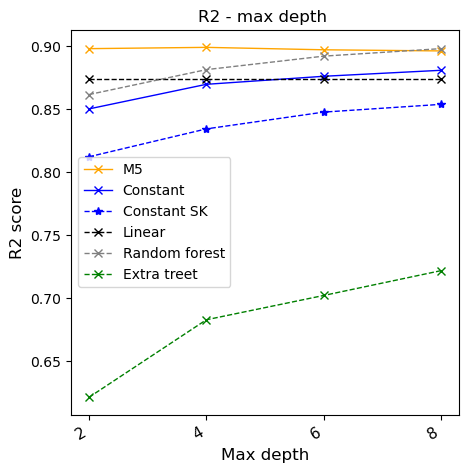

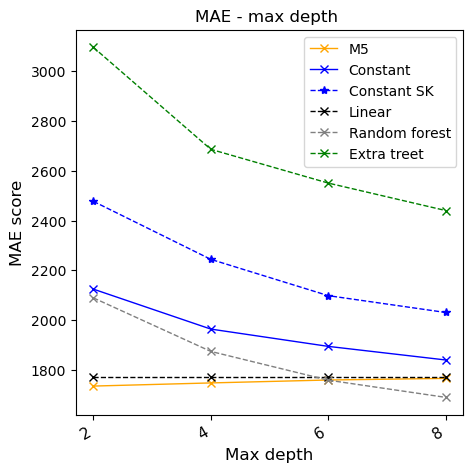

In [66]:
#Graph perceptron hold out
vals      = np.arange(len(max_depth_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_r2 , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, cons_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - max depth ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("Max depth",fontsize=12)
labels =max_depth_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(len(max_depth_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_MAE , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_MAE ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, cons_sklearn_MAE, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_MAE,"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_MAE,"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_MAE,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("MAE - max depth ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Max depth",fontsize=12)
labels =max_depth_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

In [108]:
print(y_test.shape)
print(M5regressor_r2_model)
reg.predict(X_test)

(21,)
[]


array([20752.9955738 , 17557.73843986,  3109.58404254,  8438.89875268,
       10360.50392354,  5787.54630972,  7237.40893634, 12306.20708281,
        9476.39499129, 18750.33817903, 21833.39288217,  9814.36853412,
        6176.48579793,  6042.71941497,  6115.49182073, 10742.48666679,
        5699.37598735, 21617.82606714, 10741.77729258,  7328.30441775,
       36720.69001783])

In [38]:
#regression tree from sklearn
Const_regressor_sklearn = tree.DecisionTreeRegressor(random_state=42).fit(X, y)
Const_regressor_sklearn_r2 = cross_val_score(Const_regressor_sklearn, X,y[:,None], cv=5, scoring='r2')
print(Const_regressor_sklearn_r2)

[0.92709908 0.75904275 0.86117882 0.91970257 0.86637896]


In [51]:
#Linear regression sklearn
linear_regression = LinearRegression().fit(X, y)
linear_regressor_r2 = cross_val_score(linear_regression, X,y[:,None], cv=5, scoring='r2')
print(linear_regressor_r2)

[0.89795103 0.63877231 0.83909959 0.6909876  0.75264269]


In [54]:
# Random forrest regressor
random_forest = RandomForestRegressor(max_depth=2, random_state=42).fit(X, y)
random_forest_r2 = cross_val_score(random_forrest, X,y[:,None], cv=5, scoring='r2')
print(random_forest_r2)

[0.90615141 0.6219652  0.89020851 0.81957408 0.87024365]


In [60]:
extra_tree = ExtraTreeRegressor(random_state=0).fit(X, y)
extra_tree_r2 = cross_val_score(extra_tree, X,y[:,None], cv=5, scoring='r2')
print(extra_tree_r2)

[0.82735679 0.7543453  0.77747492 0.7593696  0.70248373]


([<matplotlib.axis.XTick at 0x256bb631eb0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

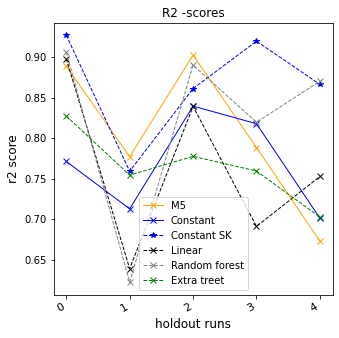

In [61]:
#Graph perceptron hold out
vals      = np.arange(5)
plt.figure(figsize=(5,5))
plt.plot(vals, M5regressor_r2,color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, Const_regressor_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, Const_regressor_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_regressor_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_forest_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_tree_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 -scores",fontsize=12)
plt.ylabel("r2 score",fontsize=12)
plt.xlabel("holdout runs",fontsize=12)
labels =np.arange(5)
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./perc_scaling_vect_selection_HO.pdf")